In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


def random_argmax(vector):
    m = np.amax(vector)
    tmp = (m == vector)
    result = np.nonzero(tmp)

    return random.choice(result[0])


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False

    # 랜덤
    e = 0.1

    while not done:
        # E-greedy
        # 새로운 path 를 찾기 위한 노력
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = random_argmax(Q[state, :])

        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


def random_argmax(vector):
    m = np.amax(vector)
    tmp = (m == vector)
    result = np.nonzero(tmp)

    return random.choice(result[0])


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False

    # episode 가 진행될 수록 e 값을 줄어들게 해준다 (random 확률 감소)
    e = 0.1 / (i+1)

    while not done:
        if np.random.rand(1) < e:
            action = env.action_space.sample()
        else:
            action = random_argmax(Q[state, :])

        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False

    while not done:

        # randn() : 표준 정규분포에서 값을 도출 (평균이 0, 표준편차 1)
        # state의 각각의 action값에 난수 추가
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n))

        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False
    # r값
    dis = 0.9

    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))
        new_state, reward, done, _ = env.step(action)
        # r값 곱해줌
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


In [ ]:
# -*- coding:utf-8 -*-

import gym

# key 입력을 받기 위해 가장 쉽게 사용할 수 있는 package
import readchar

# 호수의 크기, 바람부는지의 여부 등의 설정
from gym.envs.registration import register


LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

arrow_key = {
    '\x1b[A': UP,
    '\x1b[B': DOWN,
    '\x1b[C': RIGHT,
    '\x1b[D': LEFT
}

# v3 : 미끄럼 방지(is_slippery)를 사용할 수 있음
# v0 : stochastic
register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

# v0으로 변경
env = gym.make('FrozenLake-v0')
env.reset()
env.render()

while True:
    key = readchar.readkey()
    if key not in arrow_key.keys():
        print(key, ': 잘못된 키를 입력하여 종료합니다...')
        break

    action = arrow_key[key]
    state, reward, done, info = env.step(action)
    env.render()
    print('state: {}, action: {}, reward: {}, done: {}'.format(state, action, reward, done))
    
    if done:
        print('받은 reward: {}'.format(reward))
        break


In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v3')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False
    dis = 0.9

    while not done:

        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))

        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis*np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


In [ ]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

# stochastic 환경으로 변경
env = gym.make('FrozenLake-v0')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False
    dis = 0.9

    while not done:

        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))

        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis*np.max(Q[new_state, :])
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()


0.083
최종 Q table
[[5.49132890e-03 2.43559954e-02 2.59634891e-02 2.77504595e-03]
 [1.75230350e-03 1.88081405e-03 2.75101702e-03 2.27950770e-02]
 [2.89190281e-02 1.14496446e-03 4.49146044e-03 1.12531237e-03]
 [1.30115207e-03 1.22767402e-03 2.69703412e-04 1.32182677e-03]
 [3.99058404e-02 5.38236946e-03 4.93619221e-03 1.51580781e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.63544514e-03 1.46312985e-03 5.28015367e-02 8.92999669e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.02246812e-04 9.81617624e-03 2.19682378e-03 8.42254809e-02]
 [1.35352952e-01 4.09605157e-03 6.08841075e-03 1.25872917e-05]
 [1.72611738e-01 6.06942552e-03 0.00000000e+00 3.68644641e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 3.43788199e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 5.88367144e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.0000

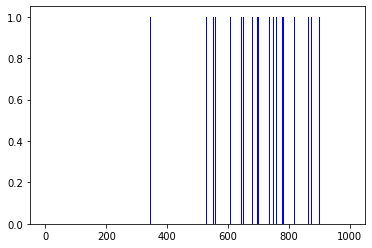

In [1]:
# -*- coding:utf-8 -*-

import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random


register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 'is_slippery': False}
)

env = gym.make('FrozenLake-v0')
Q = np.zeros([env.observation_space.n, env.action_space.n])
num_of_episodes = 1000
reward_list = []

for i in range(num_of_episodes):

    state = env.reset()
    reward_all = 0
    done = False
    dis = 0.9

    # learning rate
    learning_rate = 0.1

    while not done:

        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i+1))

        new_state, reward, done, _ = env.step(action)
        # learning rate를 이용하여 Q 함수에 대한 기대치를 줄이고, 본래 가지고 있던 값을 더 중요하게 사용하는 개념
        Q[state, action] = (1-learning_rate) * Q[state, action] + learning_rate*(reward + dis * np.max(Q[new_state, :]))
        reward_all += reward
        state = new_state

    reward_list.append(reward_all)

print(sum(reward_list) / num_of_episodes)
print('최종 Q table')
print(Q)
plt.bar(range(len(reward_list)), reward_list, color='blue')
plt.show()
